# Apple Store and Bending Spoons applications analysis

This project is aimed to analyse the dataset of Apple Store applications and spot any common trends for genre, rating and application category to figure out what popular applications share in common in order to give recommendations to the management of Bending Spoons about what applications are good to invest in. Moreover, the analysis of Bending Spoons current applications is also to be presented to have a high-level understanding of the app segmentation and focus.

For the purpose of this analysis, we will take into the consideration only apps in English language, as Bending Spoons target consumers of the applications use English and it will make analysis easier. 

The dataset we will be working with was taken from [Kaggle](https://www.kaggle.com/cmqub19/763k-ios-app-info) which details for 763,731 IOS Apps found on the Apple App store and were collected using the iTunes Search API.
The dataset includes such information as app title, developer, age rating, total rating, price, genre, etc.

## Introducing  and exploring the dataset

In [444]:
#importing libraries and reading the dataset
import pandas as pd
ios = pd.read_csv('763K_plus_IOS_Apps_Info.csv')
ios.head()

,_id,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description
0,5ddd0f935add2aa7a436dfa3,1224614786,abc - writing style cursive flashcards worksheets,Wattana Kamdee,1.202553e+09,https://apps.apple.com/us/app/abc-writing-styl...,NaN,4+,-1.0,-1.0,0.0,0,2017-04-10T23:00:59Z,2017-04-10T23:00:59Z,0.00,Games,"['Games', 'Books', 'Family']",['EN'],This application helps you practice cursive sc...
1,5ddd0f935add2aa7a436dfa4,1111182407,abcForAll,CHEN-HUNG LEE,1.111182e+09,https://apps.apple.com/us/app/abcforall/id1111...,NaN,4+,-1.0,-1.0,0.0,0,2016-05-11T02:21:43Z,2019-05-30T07:23:27Z,6.99,Education,"['Education', 'Books']",['EN'],裡面包含三個部分：電子書，我的課本和遊戲。\n電子書\n\n電子書裡有許多種類，包含發音、入...
2,5ddd0f935add2aa7a436dfa5,1203161394,abcForAll tw,CHEN-HUNG LEE,1.111182e+09,https://apps.apple.com/us/app/abcforall-tw/id1...,NaN,4+,-1.0,-1.0,0.0,0,2017-02-09T03:50:59Z,2019-05-30T07:22:55Z,0.00,Education,"['Education', 'Books']",['EN'],這是abcForAll的免費版，僅提供有限的資料庫。\n\n購買付費版即擁有以下完整內容：\...
3,5ddd0f935add2aa7a436dfa6,1257965362,abegs books reader,Arab Bureau of Education for the Gulf States,1.168221e+09,https://apps.apple.com/us/app/abegs-books-read...,https://social.abegs.org/,4+,-1.0,-1.0,0.0,0,2017-11-21T02:06:58Z,2017-11-21T02:06:58Z,0.00,Education,"['Education', 'Books']",['EN'],تطبيق اصدارات مكتب التربية العربي لدول الخليج ...
4,5ddd0f935add2aa7a436dfa7,1143009457,aBooks - Sách Truyện Online,Phuong Anh Do,9.585161e+08,https://apps.apple.com/us/app/abooks-s%C3%A1ch...,https://www.facebook.com/abooks.mobi,12+,4.5,202.0,4.5,118,2016-09-07T06:33:45Z,2018-01-17T21:10:42Z,0.00,Book,"['Books', 'Lifestyle']","['EN', 'VI']",aBooks mang lại trải nghiệm đọc sách điện tử t...


In [445]:
ios.columns

Index(['_id', 'IOS_App_Id', 'Title', 'Developer_Name', 'Developer_IOS_Id',
       'IOS_Store_Url', 'Seller_Official_Website', 'Age_Rating',
       'Total_Average_Rating', 'Total_Number_of_Ratings',
       'Average_Rating_For_Version', 'Number_of_Ratings_For_Version',
       'Original_Release_Date', 'Current_Version_Release_Date', 'Price_USD',
       'Primary_Genre', 'All_Genres', 'Languages', 'Description'],
      dtype='object')

In [446]:
ios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763831 entries, 0 to 763830
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   _id                            763831 non-null  object 
 1   IOS_App_Id                     763831 non-null  int64  
 2   Title                          724752 non-null  object 
 3   Developer_Name                 724752 non-null  object 
 4   Developer_IOS_Id               724752 non-null  float64
 5   IOS_Store_Url                  724752 non-null  object 
 6   Seller_Official_Website        311700 non-null  object 
 7   Age_Rating                     724752 non-null  object 
 8   Total_Average_Rating           763831 non-null  float64
 9   Total_Number_of_Ratings        763831 non-null  float64
 10  Average_Rating_For_Version     763831 non-null  float64
 11  Number_of_Ratings_For_Version  763831 non-null  int64  
 12  Original_Release_Date         

The dataset has 19 columns and  763,831 rows. 

## Cleaning the dataset

### Null values

In [447]:
#checking for null values in the dataset
ios.isnull().sum()

_id                                   0
IOS_App_Id                            0
Title                             39079
Developer_Name                    39079
Developer_IOS_Id                  39079
IOS_Store_Url                     39079
Seller_Official_Website          452131
Age_Rating                        39079
Total_Average_Rating                  0
Total_Number_of_Ratings               0
Average_Rating_For_Version            0
Number_of_Ratings_For_Version         0
Original_Release_Date             32684
Current_Version_Release_Date      32684
Price_USD                             0
Primary_Genre                     39079
All_Genres                        39079
Languages                         39079
Description                       39080
dtype: int64

Using the *info( )* and *isnull( )* we can see that the dataset has some null values, in particular in Title, Developer_Name, Developer_IOS_Id, IOS_Store_Url columns. We need to figure out if these values contain some errors so we have to drill down to specific rows.

In [448]:
#viewing rows with null values in 'Title' column
ios[ios['Title'].isnull()]

,_id,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description
79,5ddd0f935add2aa7a436dff2,1224197427,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
215,5ddd122c5add2aa7a436e07a,1016390082,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
443,5ddd14c35add2aa7a436e15e,1095652347,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
671,5ddd175e5add2aa7a436e242,1445973556,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
1039,5ddd1c9f5add2aa7a436e3b2,1407315204,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763783,5e5fa9cf17bb6c34a123afdc,583731702,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1,0000-00-00T00:00:00Z,0000-00-00T00:00:00Z,-1.0,NaN,NaN,NaN,NaN
763792,5e5fa9cf17bb6c34a123afe5,1486317086,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1,0000-00-00T00:00:00Z,0000-00-00T00:00:00Z,-1.0,NaN,NaN,NaN,NaN
763814,5e5fa9cf17bb6c34a123affb,1452771942,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1,0000-00-00T00:00:00Z,0000-00-00T00:00:00Z,-1.0,NaN,NaN,NaN,NaN
763819,5e5fa9cf17bb6c34a123b000,1485712567,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1,0000-00-00T00:00:00Z,0000-00-00T00:00:00Z,-1.0,NaN,NaN,NaN,NaN


As we see, all values from those rows have null values and bring no value to our analysis. Therefore, we can drop those rows.

In [449]:
#dropping null values
ios = ios.dropna(axis=0, subset=['Title'])

In [450]:
#checking for more null values
ios.isnull().sum()

_id                                   0
IOS_App_Id                            0
Title                                 0
Developer_Name                        0
Developer_IOS_Id                      0
IOS_Store_Url                         0
Seller_Official_Website          413052
Age_Rating                            0
Total_Average_Rating                  0
Total_Number_of_Ratings               0
Average_Rating_For_Version            0
Number_of_Ratings_For_Version         0
Original_Release_Date                 0
Current_Version_Release_Date          0
Price_USD                             0
Primary_Genre                         0
All_Genres                            0
Languages                             0
Description                           1
dtype: int64

After running *isnull( )* again it shows that there is only Seller_Official_Website column left with null values.

In [451]:
#viewing rows with null values in 'Seller_Official_Website' column
ios[ios['Seller_Official_Website'].isnull()]

,_id,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description
0,5ddd0f935add2aa7a436dfa3,1224614786,abc - writing style cursive flashcards worksheets,Wattana Kamdee,1.202553e+09,https://apps.apple.com/us/app/abc-writing-styl...,NaN,4+,-1.0,-1.0,0.0,0,2017-04-10T23:00:59Z,2017-04-10T23:00:59Z,0.00,Games,"['Games', 'Books', 'Family']",['EN'],This application helps you practice cursive sc...
1,5ddd0f935add2aa7a436dfa4,1111182407,abcForAll,CHEN-HUNG LEE,1.111182e+09,https://apps.apple.com/us/app/abcforall/id1111...,NaN,4+,-1.0,-1.0,0.0,0,2016-05-11T02:21:43Z,2019-05-30T07:23:27Z,6.99,Education,"['Education', 'Books']",['EN'],裡面包含三個部分：電子書，我的課本和遊戲。\n電子書\n\n電子書裡有許多種類，包含發音、入...
2,5ddd0f935add2aa7a436dfa5,1203161394,abcForAll tw,CHEN-HUNG LEE,1.111182e+09,https://apps.apple.com/us/app/abcforall-tw/id1...,NaN,4+,-1.0,-1.0,0.0,0,2017-02-09T03:50:59Z,2019-05-30T07:22:55Z,0.00,Education,"['Education', 'Books']",['EN'],這是abcForAll的免費版，僅提供有限的資料庫。\n\n購買付費版即擁有以下完整內容：\...
5,5ddd0f935add2aa7a436dfa8,1469906216,aComic Manga Comic Novel Story,Mong Anh Nguyen,1.440262e+09,https://apps.apple.com/us/app/acomic-manga-com...,NaN,9+,-1.0,-1.0,0.0,0,2019-06-30T09:21:38Z,2019-07-23T08:38:25Z,0.00,Entertainment,"['Entertainment', 'Books']",['EN'],"aComic is an online novel application, always ..."
6,5ddd0f935add2aa7a436dfa9,883528624,actmobile,Al Musanna College of Technology,8.835286e+08,https://apps.apple.com/us/app/actmobile/id8835...,NaN,4+,-1.0,-1.0,0.0,0,2014-06-11T04:20:34Z,2018-03-22T22:51:44Z,0.00,Education,"['Education', 'Books']",['EN'],Al Musanna College of Technology Mobile applic...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763813,5e5fa9cf17bb6c34a123affa,1092257731,Towered,Lisa Burns,9.341069e+08,https://apps.apple.com/us/app/towered/id109225...,NaN,4+,-1.0,-1.0,-1.0,-1,2016-03-22T21:31:53Z,2016-03-22T21:31:53Z,0.00,Games,"['Games', 'Action', 'Puzzle']",['EN'],Towered - stack em and build!\n\nHow how can y...
763824,5e5fa9cf17bb6c34a123b005,566539556,Towers Tri Peaks Solitaire,XI-ART Sp.z o.o.,1.076959e+09,https://apps.apple.com/us/app/towers-tri-peaks...,NaN,12+,4.5,428.0,4.5,3,2013-01-06T21:36:39Z,2019-12-21T20:14:34Z,0.00,Games,"['Games', 'Board', 'Card']",['EN'],Towers Tri Peaks Solitaire is your adventure i...
763827,5e5fa9cf17bb6c34a123b008,1368479683,Towerstomp,A To Play Ltd.,1.183314e+09,https://apps.apple.com/us/app/towerstomp/id136...,NaN,4+,-1.0,-1.0,-1.0,-1,2018-04-06T15:19:37Z,2018-05-23T14:31:53Z,0.00,Games,"['Games', 'Action', 'Casual']",['EN'],Towerstomp is a reaction testing one button to...
763829,5e5fa9cf17bb6c34a123b00a,824070217,Town Bird - Flap Flap Bird,Abdusodiq Saidov,6.000673e+08,https://apps.apple.com/us/app/town-bird-flap-f...,NaN,4+,-1.0,-1.0,-1.0,-1,2014-02-27T21:08:18Z,2014-07-14T16:55:43Z,0.00,Games,"['Games', 'Family', 'Adventure', 'Lifestyle']",['EN'],Very nice game Town Bird is now on your iPhone...


As we can observe, certain applications do not have their seller official website and the information was left blank. Hence, in order to fill in the blanks we will substitude all the null values with 'No website' string.

In [452]:
ios["Seller_Official_Website"].fillna("No website", inplace = True)

In [453]:
#final check for null values
ios.isnull().sum()

_id                              0
IOS_App_Id                       0
Title                            0
Developer_Name                   0
Developer_IOS_Id                 0
IOS_Store_Url                    0
Seller_Official_Website          0
Age_Rating                       0
Total_Average_Rating             0
Total_Number_of_Ratings          0
Average_Rating_For_Version       0
Number_of_Ratings_For_Version    0
Original_Release_Date            0
Current_Version_Release_Date     0
Price_USD                        0
Primary_Genre                    0
All_Genres                       0
Languages                        0
Description                      1
dtype: int64

In [454]:
ios.shape

(724752, 19)

After dropping null values and substituting them with relevant data where necessary left us with 724,752 rows to work with.

### Duplicates

The next step in the data cleaning process will be to find if there are any duplicate applications listed in the dataset.

In [455]:
#finding duplicate titles

seen = {}
dupes = []

for x in ios['Title']:
    if x not in seen:
        seen[x] = 1
    else:
        if seen[x] == 1:
            dupes.append(x)
        seen[x] += 1
        
print(len(dupes))
dupes[1:15]

916


['MyBookLibrary',
 'Nitnem',
 'ACIM',
 'Airplanes Learning Game for Children Age 2-5: Learn at the Airport',
 'Amour',
 'Animal game for children: Find the mistake in the forest',
 'BCEHS',
 'Bookey',
 'Card2Card',
 'Cornerstone Connect',
 'Elevate',
 'Folio',
 'GoodMood',
 'Infex']

After discovering 916 duplicate application titles, we still need to check if other columns are identical too. 

In [456]:
ios[ios['Title'] == 'Brain Games']

,_id,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description
231249,5dec07854de8b690f9a448d5,881398668,Brain Games,Chris Guyler,6.873185e+08,https://apps.apple.com/us/app/brain-games/id88...,No website,4+,3.0,10.0,3.5,8,2014-06-22T04:42:23Z,2014-11-10T16:27:18Z,0.0,Games,"['Games', 'Education', 'Strategy']",['EN'],"Just how smart are you? \nMath puzzles, keepin..."
398338,5e3156b608edb300095c7acb,1057959907,Brain Games,Godline Studios,1.057960e+09,https://apps.apple.com/us/app/brain-games/id10...,No website,4+,4.5,45.0,4.5,12,2015-12-04T23:25:01Z,2019-05-30T17:46:40Z,0.0,Games,"['Games', 'Entertainment', 'Puzzle', 'Family']","['EN', 'FR', 'IT', 'JA', 'KO', 'PT', 'ZH', 'ES...",Your brain also needs exercise to stay fit!!\n...


As the example above with 'Brain Games' application shows, those apps are having only the same title, while developers and other information is diffrerent.

Therefore, it makes more sence to find duplicate rows based on 'Title','Developer_Name', 'Developer_IOS_Id' columns. We do not take all the columns to consider for duplicates, as applications might have different versions. In that case, each version is different from another and rinning the duplicate command will not find any results.


In [457]:
#finding duplicate rows based on title, developer name and developer id
duplicate_row = ios[ios.duplicated(['Title','Developer_Name', 'Developer_IOS_Id'], keep = 'last')]
duplicate_row

,_id,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description
1727,5ddd25c15add2aa7a436e662,898148109,Animal game for children: Find the mistake in ...,Escaleto UG (haftungsbeschraenkt),5.317936e+08,https://apps.apple.com/us/app/animal-game-for-...,No website,4+,-1.0,-1.0,4.0,4,2014-07-26T07:00:00Z,2014-07-26T07:00:00Z,0.00,Games,"['Games', 'Family', 'Books']",['EN'],Learning game for kids aged 2-5\nExplore the w...
6115,5ddd5ee25add2aa7a436f786,1179708317,Photography Guide,Le Khac Trieu Hung,1.179357e+09,https://apps.apple.com/us/app/photography-guid...,http://giahungtrieu.net,4+,-1.0,-1.0,0.0,0,2016-12-03T00:54:33Z,2017-01-25T21:35:51Z,0.99,Book,"['Books', 'Photo & Video']","['EN', 'VI']",Photography Guide is an application written fo...
15148,5dddd3b45add2aa7a4371acf,537209007,Mini-U: ZOO Alphabet,PopAppFactory,4.211267e+08,https://apps.apple.com/us/app/mini-u-zoo-alpha...,No website,4+,3.5,21.0,2.5,6,2013-01-24T22:29:59Z,2017-09-01T21:43:57Z,2.99,Education,"['Education', 'Books']","['EN', 'RU']",SELECTED AS New and Noteworthy in 21 AppStores...
15800,5ddddcba5add2aa7a4371d5b,670259318,MÜSİAD Yayınları,GUVEN YAZILIM TEKNOLOJILERI TIC LTD STI,4.345930e+08,https://apps.apple.com/us/app/m%C3%BCsi-ad-yay...,No website,4+,-1.0,-1.0,0.0,0,2013-07-12T21:38:57Z,2018-09-05T21:51:41Z,0.00,Book,"['Books', 'News']",['EN'],iPad kullanıcıları MÜSİAD'ın yayınlarını cihaz...
38682,5de075cb5add2aa7a43776bd,1088402799,Allan Lloyds,Allan Lloyds Group,1.088403e+09,https://apps.apple.com/us/app/allan-lloyds/id1...,http://allanlloyds.com/,4+,-1.0,-1.0,0.0,0,2016-03-10T16:30:46Z,2018-06-15T14:33:39Z,0.00,Business,"['Business', 'Travel']",['EN'],Allan Lloyds Conference App is the official mo...
53898,5de13b0c5add2aa7a437b22d,375748811,Bradesco Exclusive,Banco Bradesco SA,6.686651e+08,https://apps.apple.com/us/app/bradesco-exclusi...,http://www.bradesco.com.br,4+,4.5,2694.0,4.5,177,2010-06-16T01:33:19Z,2019-10-29T01:06:52Z,0.00,Finance,"['Finance', 'Business']","['EN', 'PT']","Com o Aplicativo Bradesco Exclusive, você aces..."
53901,5de13c585add2aa7a437b230,412208449,Bradesco Prime,Banco Bradesco SA,6.686651e+08,https://apps.apple.com/us/app/bradesco-prime/i...,http://www.bradescoprime.com.br,4+,3.0,36.0,0.0,0,2011-01-04T22:14:25Z,2018-05-17T01:57:18Z,0.00,Finance,"['Finance', 'Business']","['DA', 'EN', 'FR', 'JA', 'ZH', 'ES', 'ZH']",Oferecer o que há de mais moderno sempre foi u...
53902,5de13c585add2aa7a437b231,1100347272,Bradesco Private,Banco Bradesco SA,6.686651e+08,https://apps.apple.com/us/app/bradesco-private...,http://www.bradesco.com.br,4+,4.5,28.0,0.0,0,2016-09-03T22:54:58Z,2019-10-22T01:25:51Z,0.00,Finance,"['Finance', 'Business']","['EN', 'PT']","Você, Cliente Bradesco Private Bank, agora tam..."
57974,5de170605add2aa7a437c219,1324096361,Canadian Charcoal Grill,Touch2Success,9.914727e+08,https://apps.apple.com/us/app/canadian-charcoa...,No website,4+,-1.0,-1.0,0.0,0,2017-12-15T23:24:12Z,2017-12-15T23:24:12Z,0.00,Food & Drink,"['Food & Drink', 'Business']",['EN'],"Resolve the age-old question of ""What should I..."
61437,5de19dbe5add2aa7a437cfa0,975983447,CGS-CIMB iTrade,PT CIMB SECURITIES INDONESIA,9.744266e+08,https://apps.apple.com/us/app/cgs-cimb-itrade/...,No website,4+,-1.0,-1.0,1.0,1,2015-06-25T02:54:45Z,2019-11-22T09:32:05Z,0.00,Finance,"['Finance', 'Business']",['EN'],i*Trade@CIMB is an internet online and real-ti...


There are 31 duplicate rows that we have in the dataset.

In [458]:
duplicate_row.shape

(31, 19)

The next action will be to drop them from the dataset and to have 724,721 rows on no-duplicated data.

In [459]:
ios.drop_duplicates(subset=['Title','Developer_Name', 'Developer_IOS_Id'],keep='last', inplace=True)

In [460]:
ios.shape

(724721, 19)

### Negative values

Furhter inspection of the dataset showed that there are certain negative values that indicate errors in the data.
For instance, 'Total_Average_Rating', 'Total_Number_of_Ratings', and 'Price_UDS' have minimum values of -1, which cannot be true. Price could be either 0 USD (free) or higher, but not negative. Same applies to the rating and number of ratings. Neither of them can have a negative value, therefore, we assume the data was entered incorrectly.

In [461]:
ios.describe()

,IOS_App_Id,Developer_IOS_Id,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Price_USD
count,7.247210e+05,7.247210e+05,724721.000000,7.247210e+05,7.247210e+05,724721.000000,724721.000000
mean,1.138391e+09,9.309717e+08,0.129192,6.347587e+02,4.351214e+01,39.264572,0.534096
std,2.955933e+08,3.735103e+08,2.121299,3.154346e+04,4.547687e+03,941.711330,7.131062
min,2.817365e+08,4.240900e+04,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000
25%,9.874054e+08,5.616837e+08,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,0.000000
50%,1.193159e+09,9.814802e+08,-1.000000,-1.000000e+00,0.000000e+00,0.000000,0.000000
75%,1.391170e+09,1.242220e+09,-1.000000,-1.000000e+00,3.500000e+00,1.000000,0.000000
max,1.488844e+09,1.501334e+09,5.000000,1.203608e+07,2.193230e+06,257689.000000,999.990000


But first, lest explore the 'Total_Average_Rating' column with values containing -1. 

In [462]:
ios[ios['Total_Average_Rating'] == -1]

,_id,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description
0,5ddd0f935add2aa7a436dfa3,1224614786,abc - writing style cursive flashcards worksheets,Wattana Kamdee,1.202553e+09,https://apps.apple.com/us/app/abc-writing-styl...,No website,4+,-1.0,-1.0,0.0,0,2017-04-10T23:00:59Z,2017-04-10T23:00:59Z,0.00,Games,"['Games', 'Books', 'Family']",['EN'],This application helps you practice cursive sc...
1,5ddd0f935add2aa7a436dfa4,1111182407,abcForAll,CHEN-HUNG LEE,1.111182e+09,https://apps.apple.com/us/app/abcforall/id1111...,No website,4+,-1.0,-1.0,0.0,0,2016-05-11T02:21:43Z,2019-05-30T07:23:27Z,6.99,Education,"['Education', 'Books']",['EN'],裡面包含三個部分：電子書，我的課本和遊戲。\n電子書\n\n電子書裡有許多種類，包含發音、入...
2,5ddd0f935add2aa7a436dfa5,1203161394,abcForAll tw,CHEN-HUNG LEE,1.111182e+09,https://apps.apple.com/us/app/abcforall-tw/id1...,No website,4+,-1.0,-1.0,0.0,0,2017-02-09T03:50:59Z,2019-05-30T07:22:55Z,0.00,Education,"['Education', 'Books']",['EN'],這是abcForAll的免費版，僅提供有限的資料庫。\n\n購買付費版即擁有以下完整內容：\...
3,5ddd0f935add2aa7a436dfa6,1257965362,abegs books reader,Arab Bureau of Education for the Gulf States,1.168221e+09,https://apps.apple.com/us/app/abegs-books-read...,https://social.abegs.org/,4+,-1.0,-1.0,0.0,0,2017-11-21T02:06:58Z,2017-11-21T02:06:58Z,0.00,Education,"['Education', 'Books']",['EN'],تطبيق اصدارات مكتب التربية العربي لدول الخليج ...
5,5ddd0f935add2aa7a436dfa8,1469906216,aComic Manga Comic Novel Story,Mong Anh Nguyen,1.440262e+09,https://apps.apple.com/us/app/acomic-manga-com...,No website,9+,-1.0,-1.0,0.0,0,2019-06-30T09:21:38Z,2019-07-23T08:38:25Z,0.00,Entertainment,"['Entertainment', 'Books']",['EN'],"aComic is an online novel application, always ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763823,5e5fa9cf17bb6c34a123b004,1460384647,Towers Split,Lemondo Games,1.133238e+09,https://apps.apple.com/us/app/towers-split/id1...,http://www.lemondo.com,4+,-1.0,-1.0,-1.0,-1,2019-04-27T17:05:43Z,2019-04-27T17:05:43Z,0.00,Games,['Games'],['EN'],"Climb as hi as you can, on the top of towers."
763825,5e5fa9cf17bb6c34a123b006,1466002058,Towers!,M.studios,1.262509e+09,https://apps.apple.com/us/app/towers/id1466002...,http://mstudiosgames.com,4+,-1.0,-1.0,5.0,1,2019-05-31T21:14:31Z,2019-05-31T21:14:31Z,0.00,Games,['Games'],['EN'],Press AND Hold to create the tower\nRelease yo...
763827,5e5fa9cf17bb6c34a123b008,1368479683,Towerstomp,A To Play Ltd.,1.183314e+09,https://apps.apple.com/us/app/towerstomp/id136...,No website,4+,-1.0,-1.0,-1.0,-1,2018-04-06T15:19:37Z,2018-05-23T14:31:53Z,0.00,Games,"['Games', 'Action', 'Casual']",['EN'],Towerstomp is a reaction testing one button to...
763829,5e5fa9cf17bb6c34a123b00a,824070217,Town Bird - Flap Flap Bird,Abdusodiq Saidov,6.000673e+08,https://apps.apple.com/us/app/town-bird-flap-f...,No website,4+,-1.0,-1.0,-1.0,-1,2014-02-27T21:08:18Z,2014-07-14T16:55:43Z,0.00,Games,"['Games', 'Family', 'Adventure', 'Lifestyle']",['EN'],Very nice game Town Bird is now on your iPhone...


The rows above look correct except for the rating and number of ratings columns. Therefore, these columns should be correcetd.
Due to the fact, that nether of price, ratings, or numver of ratings could be a negative number, we will replace them with 0 (closest to -1) instead of dropping them drom the dataset. 

However, due to the fact that there are 559,504 (which is 77% of the whole dataset!) rows with negative (incorrect) ratings, the downside of this replacement could be the misinterpretation of the data during the analysis, as this will influnce the mean values and percetiles. 

In [463]:
#replacing -1 values with 0
ios['Total_Average_Rating'] = ios['Total_Average_Rating'].replace(-1,0)
ios['Total_Number_of_Ratings'] = ios['Total_Number_of_Ratings'].replace(-1,0)
ios['Price_USD'] = ios['Price_USD'].replace(-1,0)
                                                                  
                                                                  
ios.describe()

,IOS_App_Id,Developer_IOS_Id,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Price_USD
count,7.247210e+05,7.247210e+05,724721.000000,7.247210e+05,7.247210e+05,724721.000000,724721.000000
mean,1.138391e+09,9.309717e+08,0.901219,6.355184e+02,4.351214e+01,39.264572,0.534252
std,2.955933e+08,3.735103e+08,1.712418,3.154344e+04,4.547687e+03,941.711330,7.131039
min,2.817365e+08,4.240900e+04,0.000000,0.000000e+00,-1.000000e+00,-1.000000,0.000000
25%,9.874054e+08,5.616837e+08,0.000000,0.000000e+00,-1.000000e+00,-1.000000,0.000000
50%,1.193159e+09,9.814802e+08,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,1.391170e+09,1.242220e+09,0.000000,0.000000e+00,3.500000e+00,1.000000,0.000000
max,1.488844e+09,1.501334e+09,5.000000,1.203608e+07,2.193230e+06,257689.000000,999.990000


We see that after we replaced negative values, there are no incorrect values in the dataset now. Although, zero rating is also not true, as most of these application have real ratings if we google some of them. But it would be daunting to check the rating for 559,528 applications.

One of the soltions will be to use a different dataset that has more complete information.
Another, is to consider only applications with non-zero ratings, which will not be quite representative sample of our population.

In [464]:
#dropping rows with zero ratings
rows_to_drop = ios[ios['Total_Average_Rating'] == 0].index
ios.drop(rows_to_drop, inplace=True)

In [465]:
ios.shape

(165217, 19)

After dropping rows with no ratings we have 165,217 rows left to work with.

### English apps

As we mentioned in our introduction to the project, we are going to analyse only applications in English language (or that have English as an option), so we can appropriately target our audience in the same market, make further recommendations to Bending Spoons and not come across any culture-related preferences of certain apps.

In [466]:
#writing a function to find apps in English
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
            
    if non_ascii > 3:
            return False
    else:
            return True
        
#checking if function works        
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热'))

True
True
False


In [467]:
#applying the function to our dataset
ios_english = []

for app in ios['Title']:
    if is_english(app):
        ios_english.append(app)
len(ios_english)

163434

In [468]:
ios = ios.loc[ios['Title'].isin(ios_english)]
ios.shape

(163434, 19)

There 163,434 applications in English in the dataset that is ready to be analysed.

## Analysing IOS apps



### Free and Paid apps

Since we have the dataset ready to work with, we can start by figuring out what is the distribution of free and paid applications in the dataset.

In [469]:
free_apps = ios[ios['Price_USD'] == 0]
paid_apps = ios[ios['Price_USD'] != 0]

print(len(free_apps))
print(len(paid_apps))

141445
21989


The graph below gives a better visual presentation. Paid apps reperesent only 13.5% of all the applications.

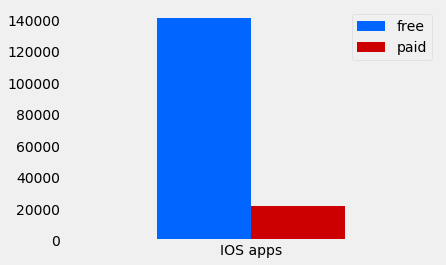

In [470]:
#visualizing the findings
import matplotlib.pyplot as plt
%matplotlib inline
color = '#0066FF','#CC0000'

plt.style.use('fivethirtyeight')
index = ['IOS apps']
df = pd.DataFrame({'free': len(free_apps),
                   'paid': len(paid_apps)}, index=index)
ax = df.plot.bar(rot=0, grid=False, color=color)

After comparing the application rating among free and paid apps in our dataset, we can observe that the percentage figures are quite close between these groups.

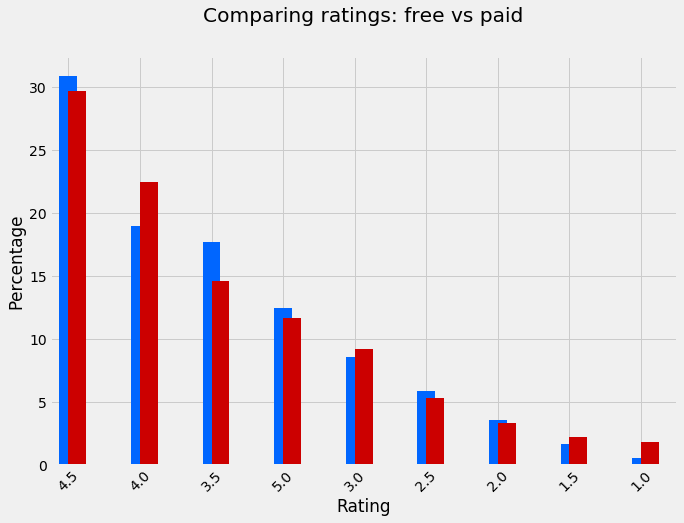

In [471]:
(free_apps['Total_Average_Rating'].value_counts(normalize=True)*100).head(10).plot.bar(color = '#0066FF', align = 'center', label = 'free', width = .25)
(paid_apps['Total_Average_Rating'].value_counts(normalize=True)*100).head(10).plot.bar(color = '#CC0000', align = 'edge', label = 'paid', width = .25,
                         rot = 45, figsize = (10,7))
plt.title('Comparing ratings: free vs paid', y = 1.07)
plt.ylabel('Percentage')
plt.xlabel('Rating')

plt.show()

In [472]:
ios['Price_USD'].value_counts(normalize=True)

0.00      0.865456
0.99      0.035390
1.99      0.027485
2.99      0.023435
4.99      0.013993
            ...   
94.99     0.000006
169.99    0.000006
46.99     0.000006
899.99    0.000006
64.99     0.000006
Name: Price_USD, Length: 70, dtype: float64

Also, 86.5% of all applications are free.

In [473]:
paid = ios[ios["Price_USD"] != 0].copy()
paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21989 entries, 59 to 763816
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _id                            21989 non-null  object 
 1   IOS_App_Id                     21989 non-null  int64  
 2   Title                          21989 non-null  object 
 3   Developer_Name                 21989 non-null  object 
 4   Developer_IOS_Id               21989 non-null  float64
 5   IOS_Store_Url                  21989 non-null  object 
 6   Seller_Official_Website        21989 non-null  object 
 7   Age_Rating                     21989 non-null  object 
 8   Total_Average_Rating           21989 non-null  float64
 9   Total_Number_of_Ratings        21989 non-null  float64
 10  Average_Rating_For_Version     21989 non-null  float64
 11  Number_of_Ratings_For_Version  21989 non-null  int64  
 12  Original_Release_Date          21989 non-nul

In [474]:
paid.describe()

,IOS_App_Id,Developer_IOS_Id,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Price_USD
count,2.198900e+04,2.198900e+04,21989.000000,21989.000000,21989.000000,21989.000000,21989.000000
mean,7.635928e+08,6.042200e+08,3.847378,748.855291,69.936832,59.906317,4.772300
std,3.519384e+08,3.308386e+08,0.916525,10380.312023,1735.988652,729.631647,15.291695
min,2.817365e+08,2.950150e+05,1.000000,0.000000,-1.000000,-1.000000,0.990000
25%,4.487862e+08,3.485902e+08,3.500000,8.000000,1.000000,1.000000,0.990000
50%,6.635526e+08,4.655876e+08,4.000000,22.000000,4.000000,4.000000,2.990000
75%,1.060475e+09,8.250479e+08,4.500000,98.000000,5.000000,14.000000,4.990000
max,1.488275e+09,1.499497e+09,5.000000,787112.000000,143493.000000,70270.000000,999.990000


The majority of paid applications have their price below UD\$100 per application. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124bc7d10>]],
      dtype=object)

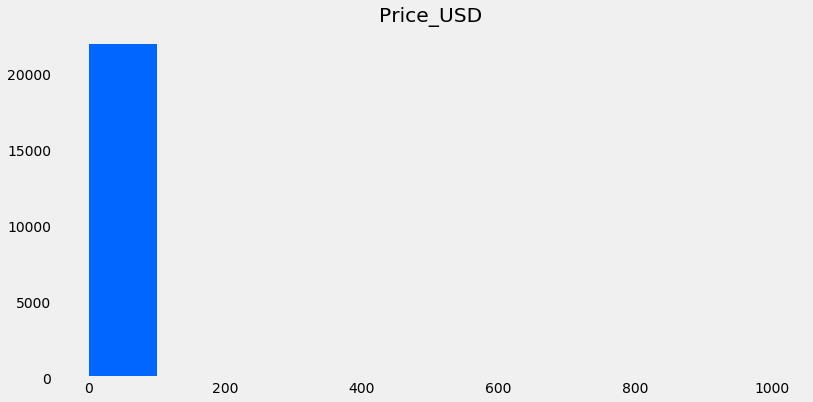

In [475]:
paid.hist(column="Price_USD", grid=False, figsize=(12,6), color='#0066FF')

When we narrow down even further, we see that the major portion lies below US\$10. Therefore, majority of application is considered to be affordable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15fb78d50>]],
      dtype=object)

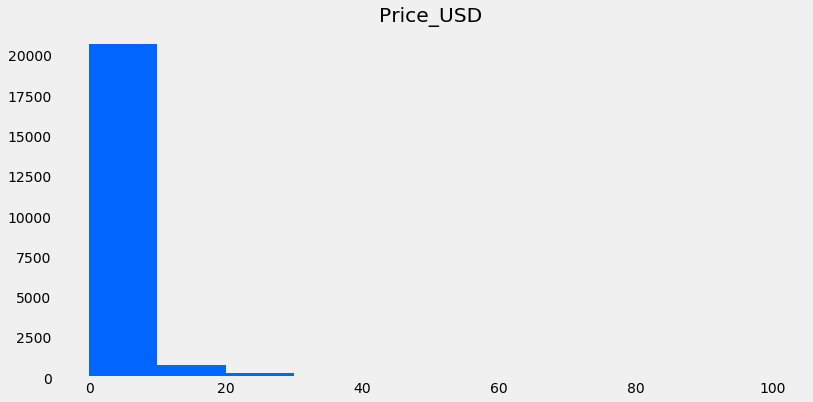

In [476]:
paid.hist(column="Price_USD", grid=False, range=[0, 100], figsize=(12,6),color='#0066FF')

### Most popular genre

While it was not surprising that free applications take up the majority of all applications, let's find out what is the most popular genre.

In [477]:
ios['Primary_Genre'].value_counts(normalize=True)*100

Games                     40.180746
Education                 13.502086
Entertainment              9.256948
Business                   7.371171
Finance                    6.802746
Music                      3.577591
Food & Drink               2.733825
Lifestyle                  2.177026
Photo & Video              2.014881
Book                       1.888836
Utilities                  1.852124
Productivity               1.661833
Reference                  1.532729
Sports                     1.040175
Travel                     0.811337
Social Networking          0.725675
News                       0.719557
Medical                    0.713438
Health & Fitness           0.558635
Shopping                   0.409340
Stickers                   0.280847
Navigation                 0.094840
Weather                    0.052621
Magazines & Newspapers     0.040995
Name: Primary_Genre, dtype: float64

Game is taking 40.2% among all genres, followed only by 13.5% and 9.3% Education adn Entertainment applications respectively.


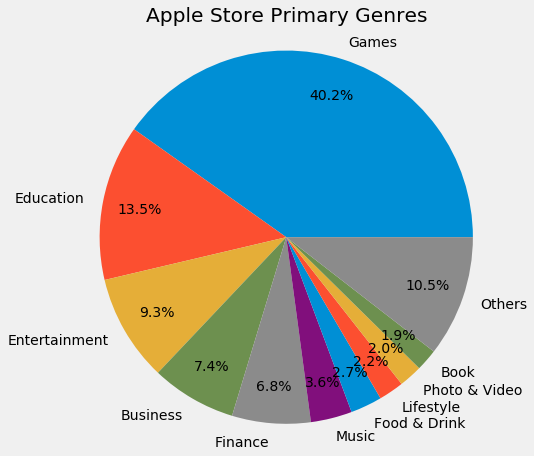

In [478]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
df = ios['Primary_Genre'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#the top 5
df2 = df[:10].copy()

#others
new_row = pd.DataFrame(data = {
    'unique_values' : ['Others'],
    'counts' : [df['counts'][10:].sum()]
})

#combining top 5 with others
df2 = pd.concat([df2, new_row])

#plotting -- for comparison left all countries and right 
#the others combined

df2.plot(kind = 'pie', y = 'counts', radius=2, labels = df2['unique_values'],autopct='%1.01f%%',labeldistance=1.1, pctdistance= 0.8, legend=False)

plt.title('Apple Store Primary Genres', y = 1.4)
plt.ylabel('')
plt.show()

In [479]:
ios['Primary_Genre'].value_counts().tail(13).copy()

Productivity              2716
Reference                 2505
Sports                    1700
Travel                    1326
Social Networking         1186
News                      1176
Medical                   1166
Health & Fitness           913
Shopping                   669
Stickers                   459
Navigation                 155
Weather                     86
Magazines & Newspapers      67
Name: Primary_Genre, dtype: int64

'Other' applications constitute of 10.5% of all applications and each of that categories takes up no more than 1.7% each.

When genres compared between free and paid applications, Games is still the most popular category. Although, the difference is not so drastic for the paid apps.

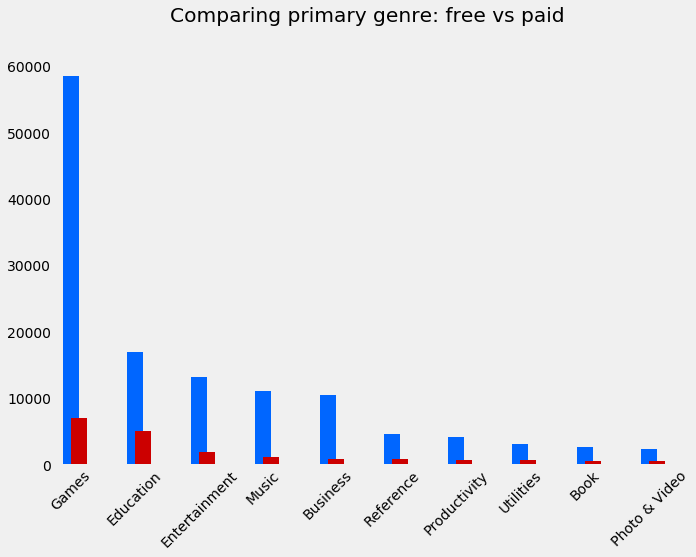

In [480]:
#finding genres distribution among free and paid apps

free_apps['Primary_Genre'].value_counts().head(10).plot.bar(color = '#0066FF', align = 'center', label = 'free', width = .25)
paid_apps['Primary_Genre'].value_counts().head(10).plot.bar(color = '#CC0000', align = 'edge', label = 'paid', width = .25,
                         rot = 45, figsize = (10,7), grid=False)
plt.title('Comparing primary genre: free vs paid', y = 1.07)

plt.show()

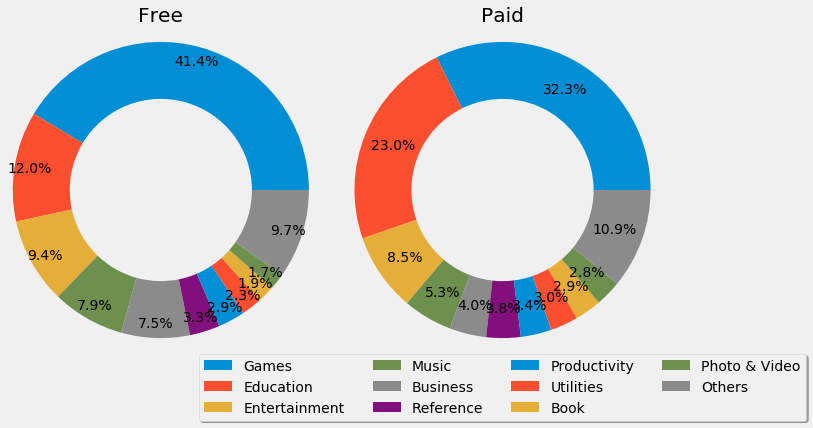

In [481]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,6))

#creating pie chart for free apps with 'Other' genres that are not in top 10 

df_free = free_apps['Primary_Genre'].value_counts().rename_axis('free_values').reset_index(name='free_counts') 
#isolating top 10 genres
df_free2 = df_free[:10].copy() 
#'other' genres
new_row_free = pd.DataFrame(data = {
    'free_values' : ['Others'],
    'free_counts' : [df_free['free_counts'][10:].sum()]})
#concatenating two df's
df_free2 = pd.concat([df_free2, new_row_free])

df_free2.plot.pie(radius = 1.3, legend= False,y = 'free_counts', ax = axes[0], autopct='%1.01f%%', pctdistance= 0.9,labeldistance=None, wedgeprops=dict(width=0.5))

#creating pie chart for paid apps with 'Other' genres that are not in top 10 

df_paid = paid_apps['Primary_Genre'].value_counts().rename_axis('paid_values').reset_index(name='paid_counts') 
df_paid2 = df_paid[:10].copy() 
new_row_paid = pd.DataFrame(data = {
    'paid_values' : ['Others'],
    'paid_counts' : [df_paid['paid_counts'][10:].sum()]})
df_paid2 = pd.concat([df_paid2, new_row_paid])


df_paid2.plot.pie(ax = axes[1], radius = 1.3, y = 'paid_counts', labels = df_paid2['paid_values'], labeldistance=None, autopct='%1.01f%%', pctdistance= 0.8, wedgeprops=dict(width=0.5))
axes[0].set_title('Free', y=1.07)
axes[1].set_title('Paid',  y=1.07)

axes[0].set_xlabel('')
axes[1].set_xlabel('')

axes[0].set_ylabel('')
axes[1].set_ylabel('')


axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4)

plt.show()

Due to the fact that gaming take such a big majority of applications of the dataset, we are going to drill down to the sub-genres.

In [482]:
games = ios.groupby('Primary_Genre').get_group('Games').copy()
games['All_Genres'].unique()

array(["['Games', 'Family', 'Books']", "['Games', 'Word', 'Books']",
       "['Games', 'Books', 'Family']", ...,
       "['Games', 'Simulation', 'Board', 'Travel']",
       "['Games', 'Music', 'Action', 'Strategy']",
       "['Games', 'Action', 'Strategy', 'Sports']"], dtype=object)

To analyse what sub-genre in Games is most frequent, we will have to modify the column to make each genre a separate string to work with.

In [483]:
games['All_Genres'] = games['All_Genres'].str.replace('[','').str.replace(']','').str.split(',')
games['All_Genres'].head()

673    ['Games',  'Family',  'Books']
685      ['Games',  'Word',  'Books']
686    ['Games',  'Family',  'Books']
688    ['Games',  'Family',  'Books']
689    ['Games',  'Books',  'Family']
Name: All_Genres, dtype: object

In [484]:
#creating a frequency table for genres in Games
dictionary = {}

for genres in games['All_Genres']:
    for word in genres:
        if word in dictionary:
            dictionary[word] += 1
        else:
            dictionary[word] = 1
dictionary


{"'Games'": 65669,
 " 'Family'": 10960,
 " 'Books'": 467,
 " 'Word'": 3349,
 " 'Puzzle'": 15929,
 " 'Casino'": 2204,
 " 'Role Playing'": 6479,
 " 'Adventure'": 9497,
 " 'Action'": 13394,
 " 'Trivia'": 3897,
 " 'Simulation'": 10502,
 " 'Music'": 2189,
 " 'Board'": 6279,
 " 'Card'": 3705,
 " 'Strategy'": 6683,
 " 'Casual'": 14499,
 " 'Business'": 52,
 " 'Sports'": 5630,
 " 'Racing'": 4305,
 " 'Education'": 5724,
 " 'Entertainment'": 31354,
 " 'Lifestyle'": 751,
 " 'Social Networking'": 308,
 " 'Finance'": 43,
 " 'Food & Drink'": 252,
 " 'Utilities'": 311,
 " 'Productivity'": 69,
 " 'Reference'": 164,
 " 'Photo & Video'": 138,
 " 'Health & Fitness'": 179,
 " 'Medical'": 34,
 " 'Travel'": 175,
 " 'Navigation'": 31,
 " 'Weather'": 10,
 " 'News'": 24,
 " 'Shopping'": 14,
 " 'Magazines & Newspapers'": 4,
 " 'Emoji & Expressions'": 2,
 " 'Gaming'": 1,
 " 'Stickers'": 2,
 " 'Comics & Cartoons'": 1}

In [485]:
#sorting the dictionary from highest value to lowest
sorted_dict = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
sorted_dict

[("'Games'", 65669),
 (" 'Entertainment'", 31354),
 (" 'Puzzle'", 15929),
 (" 'Casual'", 14499),
 (" 'Action'", 13394),
 (" 'Family'", 10960),
 (" 'Simulation'", 10502),
 (" 'Adventure'", 9497),
 (" 'Strategy'", 6683),
 (" 'Role Playing'", 6479),
 (" 'Board'", 6279),
 (" 'Education'", 5724),
 (" 'Sports'", 5630),
 (" 'Racing'", 4305),
 (" 'Trivia'", 3897),
 (" 'Card'", 3705),
 (" 'Word'", 3349),
 (" 'Casino'", 2204),
 (" 'Music'", 2189),
 (" 'Lifestyle'", 751),
 (" 'Books'", 467),
 (" 'Utilities'", 311),
 (" 'Social Networking'", 308),
 (" 'Food & Drink'", 252),
 (" 'Health & Fitness'", 179),
 (" 'Travel'", 175),
 (" 'Reference'", 164),
 (" 'Photo & Video'", 138),
 (" 'Productivity'", 69),
 (" 'Business'", 52),
 (" 'Finance'", 43),
 (" 'Medical'", 34),
 (" 'Navigation'", 31),
 (" 'News'", 24),
 (" 'Shopping'", 14),
 (" 'Weather'", 10),
 (" 'Magazines & Newspapers'", 4),
 (" 'Emoji & Expressions'", 2),
 (" 'Stickers'", 2),
 (" 'Gaming'", 1),
 (" 'Comics & Cartoons'", 1)]

([<matplotlib.axis.XTick at 0x1ad6d826d0>,
 <a list of 10 Text xticklabel objects>)

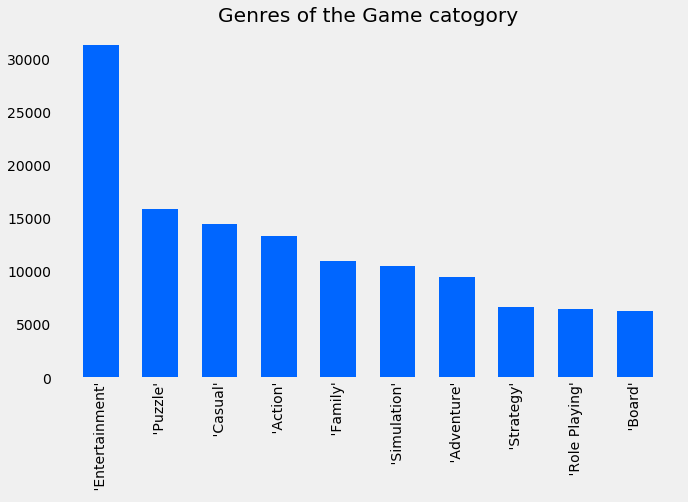

In [486]:
import numpy as np                                                               
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

labels, ys = zip(*sorted_dict[1:11])
xs = np.arange(len(labels)) 
width = 0.6

plt.figure(figsize=(10,6))
plt.bar(xs, ys, width, align='center', color = '#0066FF')
plt.grid(False)
plt.title('Genres of the Game catogory')

plt.xticks(xs, labels, rotation = 90) #Replace default x-ticks with xs, then replace xs with labels



It appears that the number one genre by frequency is 'Games'. However, we should drop this from our current exploration as it is common for every row. Therefore, games in Entertainment, Puzzle and Casual appear to be the most frequent in the dataset.

### Ratings and number of ratings

Since we dropped all the rows with negative or zero values for rating, we should expect the distribution start with 1.
It appears that the majority of ratings are distributed between 3 and 5, with the peak at 4.5 points.

Text(0.5, 1.0, 'Ratings Distribution')

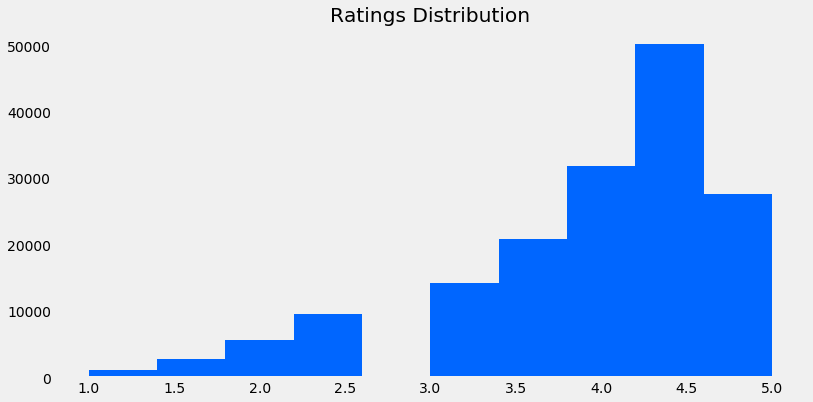

In [487]:
ios['Total_Average_Rating'].hist(range = [1,5],grid=False, figsize=(12,6), color='#0066FF')
plt.title("Ratings Distribution")

In [488]:
ios['Total_Average_Rating'].value_counts()

4.5    50182
4.0    31751
5.0    27535
3.5    20756
3.0    14127
2.5     9488
2.0     5685
1.5     2809
1.0     1101
Name: Total_Average_Rating, dtype: int64

But what if we want to see what genres have the highest rating? And what total number of people parrticipated in rating them?


In [489]:
ios.groupby('Primary_Genre').mean()[['Total_Average_Rating', 'Total_Number_of_Ratings']].sort_values('Total_Average_Rating', ascending=False)

,Total_Average_Rating,Total_Number_of_Ratings
Primary_Genre,,
Stickers,4.172113,33.885621
Games,4.054569,3305.169037
Shopping,4.041106,4372.377429
Book,4.039683,2622.719955
Finance,4.007870,4228.091383
Medical,4.003002,289.769297
Social Networking,3.999578,2414.622260
Lifestyle,3.993817,1825.672709
Music,3.992475,4501.344194


The genre with the highest rating is Stickers, followed by Games and Shopping. But, in case if the ratings are somehow biased, we also need to take number of rating into the consideration. Thus, the biggest amount of ratings is allocated to the Navigation, Food&Drink, and Photo&Video genres. This implies that more people download and use the app, more of them would rate it. 
As a result, there are more users in those categories.

In [490]:
ios.groupby('Primary_Genre').mean()[['Total_Average_Rating', 'Total_Number_of_Ratings']].sort_values('Total_Number_of_Ratings', ascending=False)

,Total_Average_Rating,Total_Number_of_Ratings
Primary_Genre,,
Navigation,3.767742,20433.751613
Food & Drink,3.930842,6599.809087
Photo & Video,3.768752,6283.836471
Music,3.992475,4501.344194
Travel,3.974359,4495.528658
Shopping,4.041106,4372.377429
Finance,4.007870,4228.091383
Games,4.054569,3305.169037
Sports,3.950000,3235.595294


However, after we looked the applications in the Navigation and sorted them by the 'Total_Number_of_Ratings' column, it is clear that the majority of the ratings are influenced by Google Maps numers, which influences the mean for that group out of 155 apps.

In [491]:
ios[ios['Primary_Genre'] == 'Navigation'].sort_values('Total_Number_of_Ratings', ascending=False)

,_id,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description
631944,5e4832da99512eab6ab8115a,585027354,Google Maps - Transit & Food,Google LLC,2.819562e+08,https://apps.apple.com/us/app/google-maps-tran...,http://maps.google.com/about,4+,4.5,3141729.0,4.5,9271,2012-12-13T04:21:00Z,2020-02-11T19:09:57Z,0.00,Navigation,"['Navigation', 'Food & Drink']","['AR', 'CA', 'ZH', 'HR', 'CS', 'DA', 'NL', 'EN...",Navigate your world faster and easier with Goo...
270810,5dee06fa4de8b690f9a4e35e,284980812,GoSkyWatch Planetarium,GoSoftWorks,2.849808e+08,https://apps.apple.com/us/app/goskywatch-plane...,http://www.gosoftworks.com,4+,4.5,10690.0,5.0,1368,2008-07-11T07:00:00Z,2019-03-04T19:00:35Z,3.99,Navigation,"['Navigation', 'Education']","['DA', 'NL', 'EN', 'FR', 'DE', 'IT', 'JA', 'ZH...","Easily and quickly identify and locate stars, ..."
401499,5e31800508edb300095c8724,645384141,Cachly - Geocaching,Zed Said Studio LLC,3.926668e+08,https://apps.apple.com/us/app/cachly-geocachin...,http://www.cach.ly,4+,4.5,2255.0,4.5,29,2015-12-11T18:01:28Z,2020-01-08T00:48:16Z,4.99,Navigation,"['Navigation', 'Entertainment']","['CA', 'CS', 'NL', 'EN', 'FR', 'DE', 'IS', 'IT...",Cachly is a simple and powerful Geocaching app...
189977,5de9e3884de8b690f9a3a79d,1440696027,Truckbook -Get Quality Drivers,Truckbook Inc,1.440696e+09,https://apps.apple.com/us/app/truckbook-get-qu...,http://truckbook.us,4+,4.5,1849.0,4.5,235,2018-11-12T05:00:54Z,2019-11-26T22:50:11Z,0.00,Navigation,"['Navigation', 'Business']",['EN'],TruckBook is a unique platform which helps Dri...
603556,5e46c1c999512eab6ab7a276,530829008,Speedometer 55 Pro. GPS kit.,Stanislav Dvoychenko,4.332598e+08,https://apps.apple.com/us/app/speedometer-55-p...,http://www.blocoware.com/iphone-ipad-speedomet...,4+,4.5,1552.0,4.5,64,2012-06-10T12:19:43Z,2019-11-25T07:46:46Z,3.99,Navigation,"['Navigation', 'Finance']","['EN', 'FR', 'DE', 'JA', 'PT', 'RU', 'ES']","A high quality Speedometer, GPS tracker and tr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364509,5e2c167b83285eb1bdc5a6ee,911035973,Whale Alert,Conserve.IO,6.514534e+08,https://apps.apple.com/us/app/whale-alert/id91...,http://www.whalealert.org,4+,4.5,4.0,22.0,7,2014-09-05T23:35:12Z,2018-08-01T13:39:39Z,0.00,Navigation,"['Navigation', 'Education']","['EN', 'FR']",Whale Alert helps reduce the chance of fatal s...
373895,5e301b5108edb300095c1b50,625472721,iCarConnect HD - the best on-board computer fo...,Lifelike UX Limited,7.996429e+08,https://apps.apple.com/us/app/icarconnect-hd-t...,No website,17+,4.0,4.0,63.0,62,2013-05-28T19:21:23Z,2013-10-25T22:55:36Z,0.00,Navigation,"['Navigation', 'Entertainment']","['EN', 'IT', 'ES']",iOS in the Car is here in your hands! \n\nWith...
373894,5e301b5108edb300095c1b4f,541860787,iCarConnect - the best on-board computer for y...,Lifelike UX Limited,7.996429e+08,https://apps.apple.com/us/app/icarconnect-the-...,No website,17+,3.5,3.5,155.0,102,2012-08-02T21:15:18Z,2013-11-05T03:18:50Z,0.00,Navigation,"['Navigation', 'Entertainment']","['EN', 'IT', 'ES']",iOS in the Car is here in your hands! \n\nWith...
364764,5e2c1a6583285eb1bdc5a7ed,347350179,Wheresit,Time Trainer,3.110024e+08,https://apps.apple.com/us/app/wheresit/id34735...,http://mgeilich.altervista.org/wheresit/wheres...,4+,1.5,0.0,68.0,-1,2010-01-11T22:40:28Z,2018-10-28T02:25:55Z,0.00,Navigation,"['Navigation', 'Education']",['EN'],How do you get around when you're off the grid...


We decided to follow the same steps to see if there are certain apps influencing the whole group figures.

In [492]:
ios[ios['Primary_Genre'] == 'Food & Drink'].sort_values('Total_Number_of_Ratings', ascending=False)

,_id,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description
625033,5e47d78e99512eab6ab7f65b,719972451,DoorDash - Food Delivery,"DoorDash, Inc.",7.199725e+08,https://apps.apple.com/us/app/doordash-food-de...,https://www.doordash.com/,12+,5.0,5541964.0,5.0,30870,2013-10-10T19:46:20Z,2020-02-12T20:40:39Z,0.0,Food & Drink,"['Food & Drink', 'Lifestyle']","['EN', 'FR', 'ES']","Food delivery anywhere you are, from a family ..."
624890,5e47d64299512eab6ab7f5cc,436491861,Domino's Pizza USA,Domino's Pizza LLC,4.364919e+08,https://apps.apple.com/us/app/dominos-pizza-us...,No website,4+,5.0,4281557.0,5.0,61818,2011-06-08T00:37:24Z,2020-01-27T14:17:13Z,0.0,Food & Drink,"['Food & Drink', 'Lifestyle']","['EN', 'ES']",Conveniently order Domino’s Pizza from anywher...
660105,5e49a07a99512eab6ab87f5b,331177714,Starbucks,Starbucks Coffee Company,3.311777e+08,https://apps.apple.com/us/app/starbucks/id3311...,http://www.starbucks.com/coffeehouse/mobile-ap...,4+,5.0,3515438.0,5.0,18360,2009-09-23T05:33:59Z,2020-02-10T17:55:14Z,0.0,Food & Drink,"['Food & Drink', 'Lifestyle']","['EN', 'FR']",The Starbucks® app is a convenient way to pay ...
632782,5e483d3f99512eab6ab814a0,302920553,Grubhub: Local Food Delivery,GrubHub.com,3.029206e+08,https://apps.apple.com/us/app/grubhub-local-fo...,http://www.grubhub.com,4+,4.5,1776236.0,4.5,8943,2009-02-04T03:37:30Z,2020-02-12T00:55:53Z,0.0,Food & Drink,"['Food & Drink', 'Travel']",['EN'],"With the largest selection of restaurants, Gru..."
664788,5e49dd6899512eab6ab891a6,1058959277,Uber Eats: Order Food Delivery,"Uber Technologies, Inc.",3.686774e+08,https://apps.apple.com/us/app/uber-eats-order-...,https://www.ubereats.com/,4+,5.0,1593856.0,2.0,342,2016-03-01T07:53:50Z,2020-02-11T18:46:17Z,0.0,Food & Drink,"['Food & Drink', 'Lifestyle']","['AR', 'AZ', 'BG', 'HR', 'CS', 'DA', 'NL', 'EN...",Find Food Delivery For Your Budget\n\nHungry? ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616510,5e47692599512eab6ab7d510,1108236817,Bread Zeppelin,Bread Zeppelin Franchise LLC,1.486435e+09,https://apps.apple.com/us/app/bread-zeppelin/i...,No website,4+,1.5,0.0,9.0,-1,2016-04-28T19:58:33Z,2020-02-10T02:36:09Z,0.0,Food & Drink,"['Food & Drink', 'Lifestyle']","['EN', 'PT', 'ES']","With the Bread Zeppelin mobile app, ordering f..."
635021,5e4859c099512eab6ab81d5f,666759664,Hungry.dk - Bestil Takeaway,Hungry.dk,6.667597e+08,https://apps.apple.com/us/app/hungry-dk-bestil...,https://www.hungry.dk/apps/,4+,4.0,0.0,5.0,-1,2013-07-08T23:45:10Z,2020-02-10T11:48:34Z,0.0,Food & Drink,"['Food & Drink', 'Lifestyle']",[],Bestil take away fra dine lokale restauranter ...
635027,5e4859c099512eab6ab81d65,311783958,HungryGoWhere,GTW Holdings,3.117840e+08,https://apps.apple.com/us/app/hungrygowhere/id...,http://www.hungrygowhere.com,4+,2.0,0.0,309.0,-1,2009-04-23T18:29:05Z,2020-02-14T03:36:32Z,0.0,Food & Drink,"['Food & Drink', 'Lifestyle']",['EN'],HungryGoWhere is the only Singapore food app y...
616514,5e47692599512eab6ab7d514,1294231025,BreadTalk Rewards,BreadTalk,5.079748e+08,https://apps.apple.com/us/app/breadtalk-reward...,http://www.breadtalk.com/,4+,2.0,0.0,5.0,-1,2017-11-28T03:40:23Z,2020-02-10T19:08:34Z,0.0,Food & Drink,"['Food & Drink', 'Shopping']",['EN'],"Eat, Drink, and Be Rewarded at more than 100 B..."


In [493]:
ios[ios['Primary_Genre'] == 'Photo & Video'].sort_values('Total_Number_of_Ratings', ascending=False)

,_id,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description
568815,5e3c54b2b604f52dee323b74,544007664,"YouTube: Watch, Listen, Stream",Google LLC,2.819562e+08,https://apps.apple.com/us/app/youtube-watch-li...,https://www.youtube.com,17+,4.5,12036084.0,4.5,22853,2012-09-11T07:23:19Z,2020-02-04T18:23:56Z,0.00,Photo & Video,"['Photo & Video', 'Entertainment']","['AF', 'SQ', 'AM', 'AR', 'HY', 'AZ', 'EU', 'BE...",Make watching your favorite videos easier with...
322283,5e29f32b83285eb1bdc501fc,448639966,PicCollage Grid & Photo Editor,Cardinal Blue,3.810578e+08,https://apps.apple.com/us/app/piccollage-grid-...,http://pic-collage.com,12+,5.0,1040657.0,5.0,1418,2011-07-13T21:30:34Z,2020-01-21T09:10:40Z,0.00,Photo & Video,"['Photo & Video', 'Education']","['EN', 'FR', 'DE', 'IT', 'JA', 'KO', 'PT', 'RU...",Our starter pack in the app is full of free st...
433636,5e33315971d5c45e988cde39,1180884341,FaceApp - AI Face Editor,FaceApp Inc,1.375946e+09,https://apps.apple.com/us/app/faceapp-ai-face-...,https://www.faceapp.com,4+,4.5,825560.0,4.5,284,2017-01-24T14:13:07Z,2020-01-29T07:55:43Z,0.00,Photo & Video,"['Photo & Video', 'Entertainment']","['AR', 'NL', 'EN', 'FR', 'DE', 'HE', 'ID', 'IT...",Get magazine cover quality for any selfie with...
462312,5e34a70971d5c45e988d4e3d,997362197,InShot - Video Editor,InstaShot Inc.,8.675863e+08,https://apps.apple.com/us/app/inshot-video-edi...,No website,4+,5.0,698293.0,5.0,24363,2015-06-11T17:51:54Z,2020-01-08T18:05:11Z,0.00,Photo & Video,"['Photo & Video', 'Entertainment']","['AR', 'EN', 'FR', 'DE', 'ID', 'IT', 'JA', 'KO...","InShot - Handy, Comprehensive and Fun!\n\nFeat..."
443781,5e33b63371d5c45e988d05da,844570015,Funimate Video Musical Editor,"Avcr, Inc.",8.445700e+08,https://apps.apple.com/us/app/funimate-video-m...,http://funimate.com,12+,4.5,475582.0,4.5,27139,2014-04-18T01:32:38Z,2020-01-03T18:48:22Z,0.00,Photo & Video,"['Photo & Video', 'Entertainment']","['EN', 'FR', 'DE', 'JA', 'KO', 'ZH', 'ES']",Ranked #1 on the App Store in more than 100 co...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395444,5e3132d408edb300095c6f7d,987481537,Blend Collage Maker,Himanshu Yadav,8.966308e+08,https://apps.apple.com/us/app/blend-collage-ma...,No website,4+,1.0,0.0,10.0,-1,2015-04-30T23:06:08Z,2019-12-31T22:40:43Z,0.00,Photo & Video,"['Photo & Video', 'Entertainment']",['EN'],Blend Collage is a powerful image editing tool...
517991,5e377b8671d5c45e988e27bc,1049432684,Reels by Rhinobird,Rhinobird,1.049433e+09,https://apps.apple.com/us/app/reels-by-rhinobi...,https://rhinobird.tv,9+,5.0,0.0,5.0,-1,2017-02-23T08:05:11Z,2018-10-31T13:34:31Z,0.00,Photo & Video,"['Photo & Video', 'Entertainment']",['EN'],Gain exclusive video access to your favorite a...
483158,5e35b64371d5c45e988d9fab,605667040,Merry Christmas Photo Frames HD,KIT YEE LOU,5.955672e+08,https://apps.apple.com/us/app/merry-christmas-...,http://www.facebook.com/pages/IPad-App-Sweet-F...,4+,3.5,0.0,6.0,-1,2013-02-26T08:00:00Z,2015-12-06T19:56:20Z,0.00,Photo & Video,"['Photo & Video', 'Entertainment']",['EN'],Holiday season has come!\n\nThis app helps you...
382245,5e3089a008edb300095c3bee,492916690,AnalogColor,pentacom,4.544915e+08,https://apps.apple.com/us/app/analogcolor/id49...,http://www.pentacom.jp/pentacom/analogcolor_mo...,4+,3.0,0.0,30.0,-1,2012-01-19T08:00:00Z,2019-09-04T03:19:06Z,1.99,Photo & Video,"['Photo & Video', 'Entertainment']",['EN'],AnalogColor is a photo editing tool. convert d...


Even though the numbers for these genres are more spread, we can still see ceratain group leaders like Youtube.

In order to see how many outliers our dataset actually has, we used seaborn to visually show us in the boxplot below.

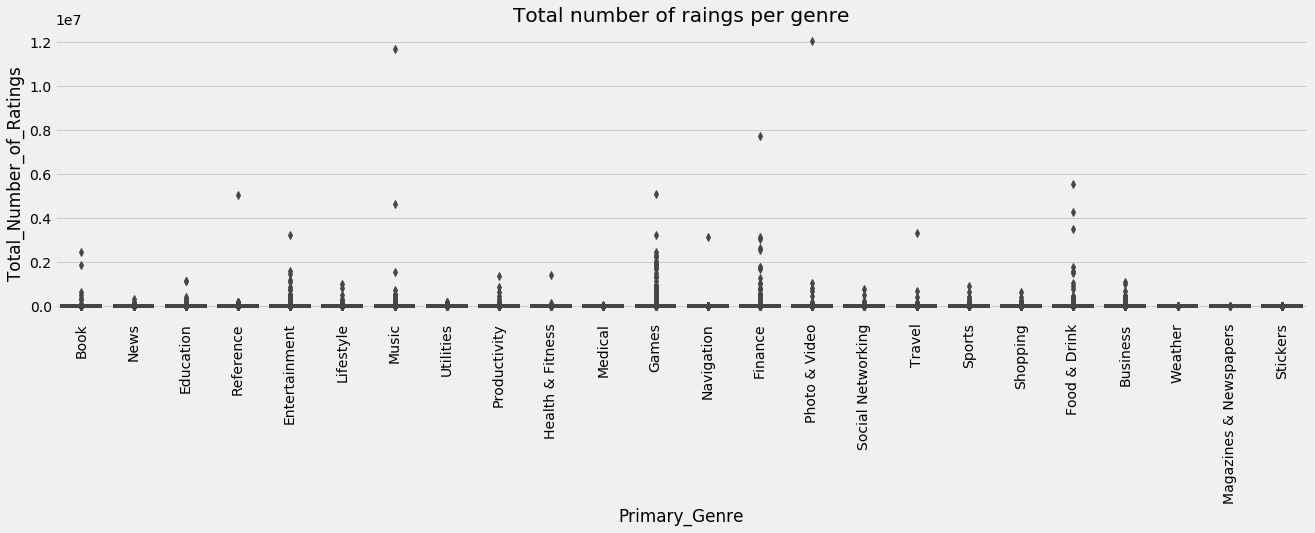

In [494]:
import seaborn as sns

plt.figure(figsize=(20,5))
ax = sns.boxplot(x = 'Primary_Genre', y = 'Total_Number_of_Ratings', data = ios)
plt.title("Total number of raings per genre")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

We can observe that the significant outliers are in Music, Games, Photos & Video, and Finance. Thus, the average number of ratings will be influenced by theses numbers.

When comparing average rating distribution across different genres, the majority has the 3rd percentile around 4.5. Applications with better lower scores start from 2.0 points and  are among Book, Education, Medical, Games, Sports genres.

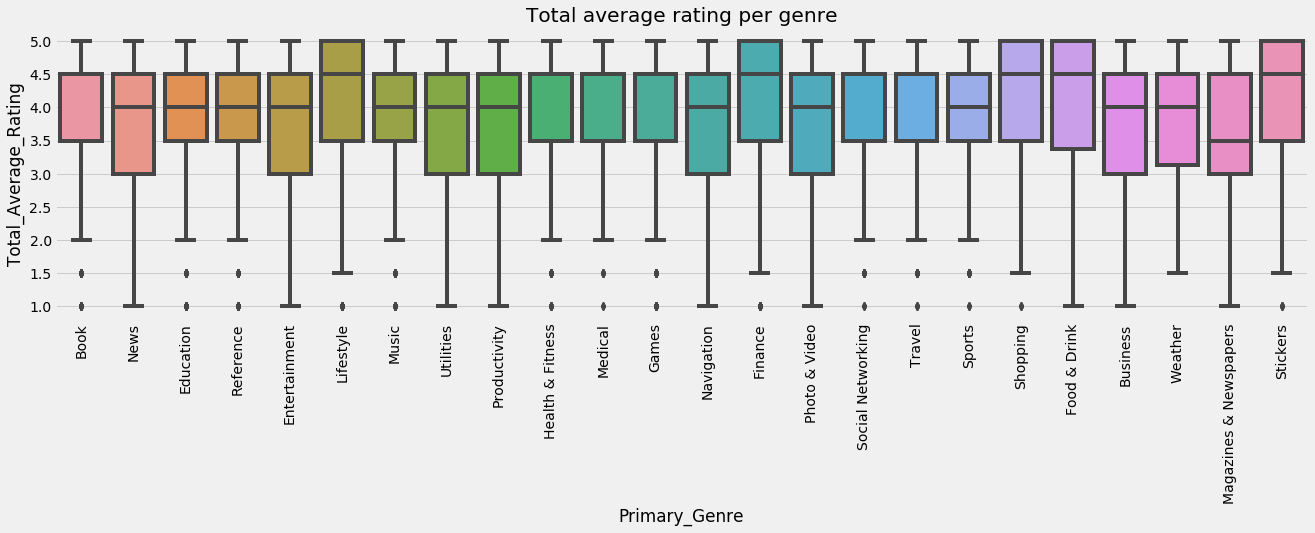

In [495]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(x = 'Primary_Genre', y = 'Total_Average_Rating', data = ios)
plt.title("Total average rating per genre")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

Let's now examine how ratings vary in different genres among free and paid apps.

Text(0.5, 1.0, 'Paid')

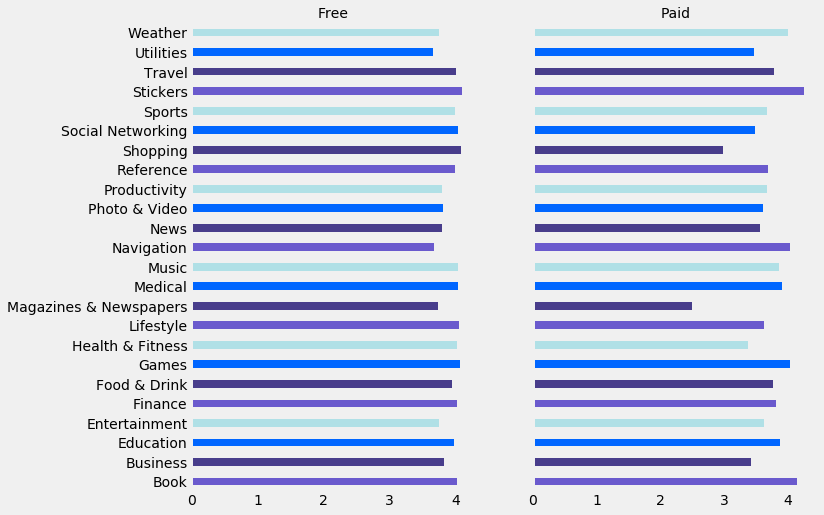

In [496]:
plt.style.use('fivethirtyeight')

import matplotlib.pyplot as plt


my_colors = 'slateblue','darkslateblue','#0066FF','powderblue'

pfig, axarr = plt.subplots(1, 2, figsize=(10, 8))
   
free_apps.groupby('Primary_Genre').mean()[['Total_Average_Rating']].plot.barh(color = my_colors, align = 'center', label = 'free', width = .4,
                                                                              rot = 0, legend=False, ax=axarr[0], grid=False)
paid_apps.groupby('Primary_Genre').mean()[['Total_Average_Rating']].plot.barh(color = my_colors, align = 'edge', label = 'paid', width = .4, legend = False,
                         rot = 0, ax=axarr[1], grid=False)
axarr[0].set_ylabel("")
axarr[1].set_ylabel("")
axarr[1].yaxis.set_visible(False)


axarr[0].set_title("Free", fontsize=14)
axarr[1].set_title("Paid", fontsize=14)





It is clear that there is no significant difference in average rating in various genres among free and paid applications. Now, we can compare if the same could be true for total number of ratings.

Text(0.5, 1.0, 'Paid')

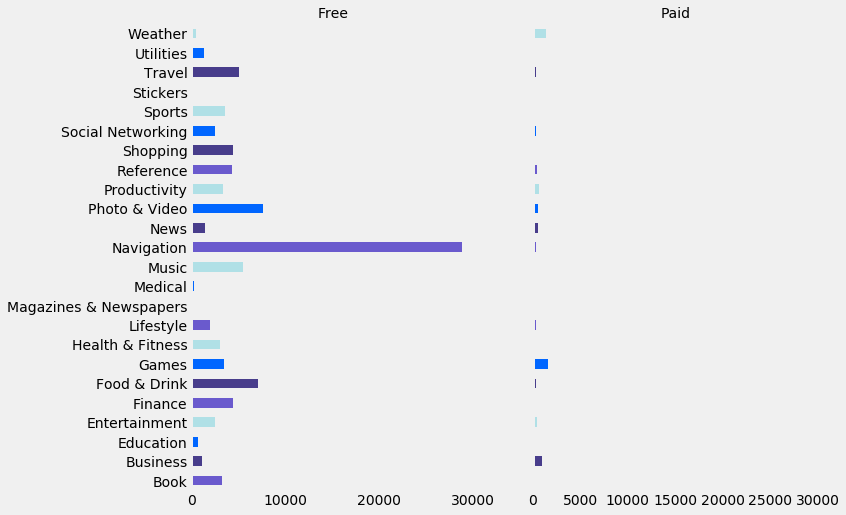

In [497]:
my_colors = 'slateblue','darkslateblue','#0066FF','powderblue'

pfig, axarr = plt.subplots(1, 2, figsize=(10, 8))
   
free_apps.groupby('Primary_Genre').mean()[['Total_Number_of_Ratings']].plot.barh(color = my_colors, align = 'center', label = 'free', width = .5,
                                                                              rot = 0, legend=False, ax=axarr[0], grid=False)
paid_apps.groupby('Primary_Genre').mean()[['Total_Number_of_Ratings']].plot.barh(color = my_colors, align = 'edge', label = 'paid', width = .5, legend = False,
                         rot = 0, ax=axarr[1], grid=False)
axarr[0].set_ylabel("")
axarr[1].set_ylabel("")
axarr[1].set_xlim(0,30000)

axarr[1].yaxis.set_visible(False)


axarr[0].set_title("Free", fontsize=14)
axarr[1].set_title("Paid", fontsize=14)



It is interesting to find out that the number of ratings for free applications is so significant compared to paid applications. Therefore, it seems common that people tend to rate free applications more often. Which makes sense, as more people could use the application without paying for it.

We can also observe that the most expensive categories/genres among paid apps are Navigation, Reference, and Medical as users are willing to pay for the quality of the information and content these applications provide. The most popular Games category is not among top 10 expensive categories by their average price.

Text(0.5, 1.0, 'Categories by their average price')

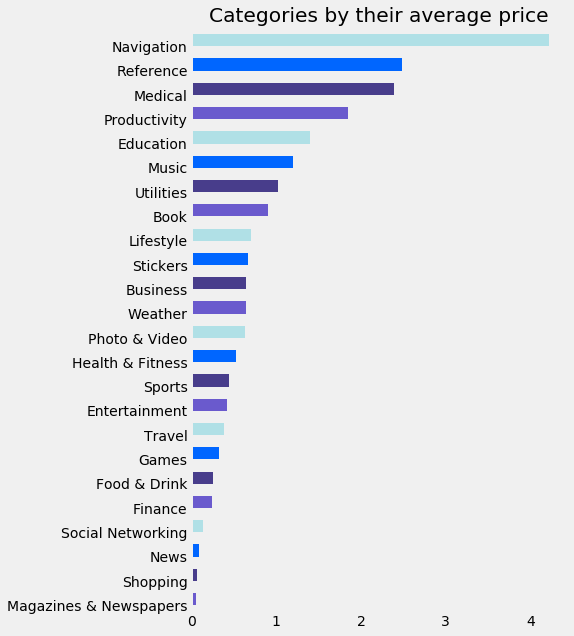

In [498]:
#the most expensice category

ios.groupby('Primary_Genre').mean()[['Price_USD']].sort_values('Price_USD').plot.barh(color = my_colors, align = 'edge', label = 'paid', width = .5, legend = False,
                         rot = 0, grid=False, figsize=(6,10))
plt.ylabel("")
plt.title('Categories by their average price')


### Content type

The majority of all applications in our dataset are for audience which is 4+, where only tiny part of applications being restricted to 17+.

Text(0.5, 1.07, 'Frequency of Apps based on content type')

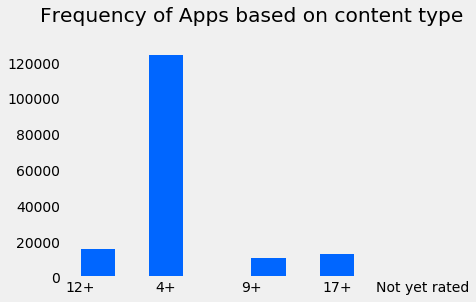

In [499]:
ios['Age_Rating'].hist(grid=False, color='#0066FF')
plt.title("Frequency of Apps based on content type", y=1.07)

## Bending Spoons apps analisys

Before we start analysing applications created by Bending Spoons, we need to find them in our dataset first. We will try if finding using the name of most popular applications will give us any result.

In [500]:
#popular Bending Spoons apps
applications = ['Splice', '30 day fitness', 'Yoga Wave', 'Sleep']

#finding apps  by their Title
ios['Indexes'] = ios['Title'].str.find('Yoga')
ios
ios['Indexes'].value_counts()


-1     163400
 0         10
 13         3
 10         3
 12         2
 7          2
 14         2
 16         1
 15         1
 39         1
 24         1
 17         1
 11         1
 19         1
 8          1
 21         1
 6          1
 5          1
 25         1
Name: Indexes, dtype: int64

In [501]:
ios[ios['Indexes'] == 1]

,_id,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description,Indexes


It is not a suprise that we did not get a result we were hoping for, as there are many applications that share common words in their titles. Instead of the application title, we will start looking for the developer's name.

In [502]:
ios['Developers'] = ios['Developer_Name'].str.find('Bending')
ios['Developers'].value_counts()

-1    163388
 0        46
Name: Developers, dtype: int64

In [503]:
ios[ios['Developers'] == 0]

,_id,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,...,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description,Indexes,Developers
18810,5dde03f65add2aa7a437291d,1214593569,READIT - Chat Stories,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/readit-chat-stor...,http://bendingspoonsapps.com/products.html?app...,17+,4.5,33933.0,...,657,2017-03-14T00:31:17Z,2019-07-11T06:58:42Z,0.00,Book,['Books'],"['AR', 'ZH', 'EN', 'FR', 'DE', 'IT', 'JA', 'KO...","Want to dive into a world of mystery, thriller...",-1,0
382249,5e3089a008edb300095c3bf2,1315469453,Anamorph,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/anamorph/id13154...,https://www.playond.com,4+,4.0,4.5,...,27,2018-08-01T07:00:00Z,2019-08-19T09:38:16Z,0.00,Games,"['Games', 'Family', 'Puzzle', 'Entertainment']",['EN'],Anamorph is a Playond exclusive. Download and ...,-1,0
415996,5e323be108edb300095cbfc5,808296431,Crashlands,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/crashlands/id808...,https://www.playond.com/,9+,4.5,5.0,...,81,2016-01-21T06:10:21Z,2019-08-07T00:05:57Z,6.99,Games,"['Games', 'Adventure', 'Role Playing', 'Entert...",['EN'],"""...a design masterpiece."" 5/5 - TouchArcade\n...",-1,0
419469,5e32690008edb300095ccd56,1458791714,Daggerhood,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/daggerhood/id145...,https://www.playond.com,9+,4.5,1931.0,...,1274,2019-05-08T07:00:00Z,2019-10-21T08:04:21Z,0.00,Games,"['Games', 'Casual', 'Entertainment', 'Adventure']",['EN'],Daggerhood is a Playond exclusive. Download an...,-1,0
449570,5e3401f371d5c45e988d1c77,1350108189,Gravity Dash: Endless Runner,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/gravity-dash-end...,https://www.playond.com,9+,4.5,40.0,...,18,2018-03-07T17:02:39Z,2019-09-16T07:44:33Z,0.00,Games,"['Games', 'Entertainment', 'Action', 'Casual']",['EN'],Gravity Dash is a Playond exclusive. Download ...,-1,0
475155,5e354dc471d5c45e988d8068,1372526321,Live Quiz - Win Real Prizes,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/live-quiz-win-re...,http://livequiz.app,17+,4.0,13.0,...,2,2018-06-20T11:31:10Z,2019-12-17T17:24:23Z,0.00,Entertainment,"['Entertainment', 'Games', 'Trivia']",['EN'],Live Quiz is a Bending Spoons creation: it's t...,-1,0
487392,5e35ed1e71d5c45e988db035,1208348913,Motif.,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/motif/id12083489...,https://www.playond.com,4+,4.0,90.0,...,14,2017-08-29T21:19:01Z,2019-08-19T10:15:21Z,0.00,Games,"['Games', 'Entertainment', 'Puzzle', 'Family']",['EN'],Motif is a Playond exclusive. Download and sub...,-1,0
490108,5e36103b71d5c45e988dbad1,1206606052,My Friends Are Zombies,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/my-friends-are-z...,https://www.playond.com,12+,5.0,40.0,...,18,2017-08-02T07:30:34Z,2019-08-19T10:19:29Z,0.00,Games,"['Games', 'Action', 'Casual', 'Entertainment']",['EN'],My Friends Are Zombies is a Playond exclusive....,-1,0
505242,5e36d63271d5c45e988df5ef,1461451634,Playond - Games Collection,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/playond-games-co...,https://www.playond.com,4+,4.5,1877.0,...,196,2019-07-26T03:42:32Z,2020-01-20T10:25:34Z,0.00,Entertainment,['Entertainment'],['EN'],Playond is a collection of acclaimed mobile ga...,-1,0
519876,5e37942971d5c45e988e2f19,1310491340,Rized Color by Number Book,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/rized-color-by-n...,http://bendingspoonsapps.com/products.html?app...,4+,4.5,6401.0,...,24,2017-11-15T14:12:49Z,2019-12-02T09:11:44Z,0.00,Entertainment,"['Entertainment', 'Lifestyle']","['DA', 'NL', 'EN', 'FI', 'FR', 'DE', 'EL', 'ID...",Enjoy colo-RIZED experiences\nRized - Color By...,-1,0


And it worked! We now know that the full name of the developer is 'Bending Spoons Apps IVS', which will let us select all the applications from this developer in our dataset.

In [504]:
bending_spoons = ios[ios['Developer_Name']=='Bending Spoons Apps IVS']
bending_spoons

,_id,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,...,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description,Indexes,Developers
18810,5dde03f65add2aa7a437291d,1214593569,READIT - Chat Stories,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/readit-chat-stor...,http://bendingspoonsapps.com/products.html?app...,17+,4.5,33933.0,...,657,2017-03-14T00:31:17Z,2019-07-11T06:58:42Z,0.00,Book,['Books'],"['AR', 'ZH', 'EN', 'FR', 'DE', 'IT', 'JA', 'KO...","Want to dive into a world of mystery, thriller...",-1,0
382249,5e3089a008edb300095c3bf2,1315469453,Anamorph,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/anamorph/id13154...,https://www.playond.com,4+,4.0,4.5,...,27,2018-08-01T07:00:00Z,2019-08-19T09:38:16Z,0.00,Games,"['Games', 'Family', 'Puzzle', 'Entertainment']",['EN'],Anamorph is a Playond exclusive. Download and ...,-1,0
415996,5e323be108edb300095cbfc5,808296431,Crashlands,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/crashlands/id808...,https://www.playond.com/,9+,4.5,5.0,...,81,2016-01-21T06:10:21Z,2019-08-07T00:05:57Z,6.99,Games,"['Games', 'Adventure', 'Role Playing', 'Entert...",['EN'],"""...a design masterpiece."" 5/5 - TouchArcade\n...",-1,0
419469,5e32690008edb300095ccd56,1458791714,Daggerhood,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/daggerhood/id145...,https://www.playond.com,9+,4.5,1931.0,...,1274,2019-05-08T07:00:00Z,2019-10-21T08:04:21Z,0.00,Games,"['Games', 'Casual', 'Entertainment', 'Adventure']",['EN'],Daggerhood is a Playond exclusive. Download an...,-1,0
449570,5e3401f371d5c45e988d1c77,1350108189,Gravity Dash: Endless Runner,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/gravity-dash-end...,https://www.playond.com,9+,4.5,40.0,...,18,2018-03-07T17:02:39Z,2019-09-16T07:44:33Z,0.00,Games,"['Games', 'Entertainment', 'Action', 'Casual']",['EN'],Gravity Dash is a Playond exclusive. Download ...,-1,0
475155,5e354dc471d5c45e988d8068,1372526321,Live Quiz - Win Real Prizes,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/live-quiz-win-re...,http://livequiz.app,17+,4.0,13.0,...,2,2018-06-20T11:31:10Z,2019-12-17T17:24:23Z,0.00,Entertainment,"['Entertainment', 'Games', 'Trivia']",['EN'],Live Quiz is a Bending Spoons creation: it's t...,-1,0
487392,5e35ed1e71d5c45e988db035,1208348913,Motif.,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/motif/id12083489...,https://www.playond.com,4+,4.0,90.0,...,14,2017-08-29T21:19:01Z,2019-08-19T10:15:21Z,0.00,Games,"['Games', 'Entertainment', 'Puzzle', 'Family']",['EN'],Motif is a Playond exclusive. Download and sub...,-1,0
490108,5e36103b71d5c45e988dbad1,1206606052,My Friends Are Zombies,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/my-friends-are-z...,https://www.playond.com,12+,5.0,40.0,...,18,2017-08-02T07:30:34Z,2019-08-19T10:19:29Z,0.00,Games,"['Games', 'Action', 'Casual', 'Entertainment']",['EN'],My Friends Are Zombies is a Playond exclusive....,-1,0
505242,5e36d63271d5c45e988df5ef,1461451634,Playond - Games Collection,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/playond-games-co...,https://www.playond.com,4+,4.5,1877.0,...,196,2019-07-26T03:42:32Z,2020-01-20T10:25:34Z,0.00,Entertainment,['Entertainment'],['EN'],Playond is a collection of acclaimed mobile ga...,-1,0
519876,5e37942971d5c45e988e2f19,1310491340,Rized Color by Number Book,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/rized-color-by-n...,http://bendingspoonsapps.com/products.html?app...,4+,4.5,6401.0,...,24,2017-11-15T14:12:49Z,2019-12-02T09:11:44Z,0.00,Entertainment,"['Entertainment', 'Lifestyle']","['DA', 'NL', 'EN', 'FI', 'FR', 'DE', 'EL', 'ID...",Enjoy colo-RIZED experiences\nRized - Color By...,-1,0


Based on the table above, there are 46 apps from Bending Spoons Apps IVS. Among which, there are 41 apps (85% of total) in Games category. And, taking into consideration the fact that Games genre is the most popular among App Store apps and has one of highest average ratings, this is a good area to invest time, research and development.

In [505]:
bending_spoons['Primary_Genre'].value_counts()

Games            41
Entertainment     3
Book              1
Photo & Video     1
Name: Primary_Genre, dtype: int64

In [506]:
bending_spoons.groupby(['Primary_Genre', 'Total_Average_Rating']).count()


_id  IOS_App_Id  Title  Developer_Name  \
Primary_Genre Total_Average_Rating                                           
Book          4.5                     1           1      1               1   
Entertainment 4.0                     1           1      1               1   
              4.5                     2           2      2               2   
Games         3.0                     1           1      1               1   
              3.5                     3           3      3               3   
              4.0                    10          10     10              10   
              4.5                    22          22     22              22   
              5.0                     5           5      5               5   
Photo & Video 4.5                     1           1      1               1   

                                    Developer_IOS_Id  IOS_Store_Url  \
Primary_Genre Total_Average_Rating                                    
Book          4.5                                  1              1   
Entertainment 4.0                                  1              1   
              4.5                                  2              2   
Games         3.0                                  1              1   
              3.5                                  3              3   
              4.0                                 10             10   
              4.5                                 22             22   
              5.0                                  5              5   
Photo & Video 4.5                                  1              1   

                                    Seller_Official_Website  Age_Rating  \
Primary_Genre Total_Average_Rating                                        
Book          4.5                                         1           1   
Entertainment 4.0                                         1           1   
              4.5                                         2           2   
Games         3.0                                         1           1   
              3.5                                         3           3   
              4.0                                        10          10   
              4.5                                        22          22   
              5.0                                         5           5   
Photo & Video 4.5                                         1           1   

                                    Total_Number_of_Ratings  \
Primary_Genre Total_Average_Rating                            
Book          4.5                                         1   
Entertainment 4.0                                         1   
              4.5                                         2   
Games         3.0                                         1   
              3.5                                         3   
              4.0                                        10   
              4.5                                        22   
              5.0                                         5   
Photo & Video 4.5                                         1   

                                    Average_Rating_For_Version  \
Primary_Genre Total_Average_Rating                               
Book          4.5                                            1   
Entertainment 4.0                                            1   
              4.5                                            2   
Games         3.0                                            1   
              3.5                                            3   
              4.0                                           10   
              4.5                                           22   
              5.0                                            5   
Photo & Video 4.5                                            1   

                                    Number_of_Ratings_For_Version  \
Primary_Genre Total_Average_Rating                                  
Book      

Looking into each category separately and comparing their average ratings gives us a general overview on how these applications perform. We can observe that all genres have pretty high ratings, with the only exception in Games (ratings of 3.0 and 3.5). We can check those applications separately and see if there are any measure to be taken to improve the rating.

In [507]:
by_genre = bending_spoons.groupby(['Primary_Genre']).get_group('Games')

by_genre.sort_values(['Total_Average_Rating'], ascending = True)

,_id,IOS_App_Id,Title,Developer_Name,Developer_IOS_Id,IOS_Store_Url,Seller_Official_Website,Age_Rating,Total_Average_Rating,Total_Number_of_Ratings,...,Number_of_Ratings_For_Version,Original_Release_Date,Current_Version_Release_Date,Price_USD,Primary_Genre,All_Genres,Languages,Description,Indexes,Developers
692091,5e4b408099512eab6ab8fc4d,1480518197,Crashlands - Playond,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/crashlands-playo...,https://www.playond.com,4+,3.0,21.0,...,18,2019-10-01T15:09:08Z,2019-10-31T10:06:50Z,0.00,Games,"['Games', 'Action', 'Adventure']",['EN'],"- ""A design masterpiece."" 5/5 - TouchArcade\n-...",-1,0
535058,5e385b8171d5c45e988e6a67,1076728632,Sparkwave,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/sparkwave/id1076...,https://www.playond.com,4+,3.5,183.0,...,13,2016-02-24T22:22:23Z,2019-09-26T07:51:57Z,0.00,Games,"['Games', 'Casual', 'Entertainment', 'Racing']",['EN'],Sparkwake is a Playond exclusive. Download and...,-1,0
671284,5e4a318b99512eab6ab8ab06,1434235674,Achromatic!,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/achromatic/id143...,https://www.playond.com,4+,3.5,142.0,...,102,2018-10-17T07:00:00Z,2019-08-19T09:35:25Z,0.00,Games,"['Games', 'Puzzle']",['EN'],Achromatic is a Playond exclusive. Download an...,-1,0
706277,5e4bfd293624bf32156e2834,403533758,Flying Hamster,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/flying-hamster/i...,https://www.playond.com,12+,3.5,969.0,...,11,2011-01-06T03:13:15Z,2019-09-16T08:33:56Z,0.00,Games,"['Games', 'Action', 'Casual']",['EN'],Flying Hamster is a Playond exclusive. Downloa...,-1,0
693779,5e4b567c99512eab6ab902e5,1330051577,Cubor,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/cubor/id13300515...,https://www.playond.com,4+,4.0,296.0,...,129,2018-02-14T08:00:00Z,2019-08-19T09:50:18Z,0.00,Games,"['Games', 'Strategy', 'Puzzle']",['EN'],Cubor is a Playond exclusive. Download and sub...,-1,0
675483,5e4a680199512eab6ab8bb6d,1460241297,Auctioneer: The Game,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/auctioneer-the-g...,https://www.playond.com,4+,4.0,22.0,...,18,2019-06-05T03:36:05Z,2019-09-16T07:48:22Z,0.00,Games,['Games'],['EN'],Auctioneer is a Playond exclusive. Download an...,-1,0
707171,5e4c08f63624bf32156e2bb2,1239132329,Fowlst,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/fowlst/id1239132...,https://www.playond.com,12+,4.0,204.0,...,41,2017-06-12T12:12:47Z,2019-11-18T08:54:06Z,0.00,Games,"['Games', 'Casual', 'Action']",['EN'],Fowlst is a Playond exclusive. Download and su...,-1,0
535533,5e3860b271d5c45e988e6c42,1459350707,Spellsword Cards: Origins,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/spellsword-cards...,https://www.playond.com,9+,4.0,141.0,...,56,2019-05-02T07:00:00Z,2019-09-26T07:56:41Z,0.00,Games,"['Games', 'Entertainment', 'Card', 'Strategy']","['ZH', 'EN']",Spellsword Cards: Origins is a Playond exclusi...,-1,0
382249,5e3089a008edb300095c3bf2,1315469453,Anamorph,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/anamorph/id13154...,https://www.playond.com,4+,4.0,4.5,...,27,2018-08-01T07:00:00Z,2019-08-19T09:38:16Z,0.00,Games,"['Games', 'Family', 'Puzzle', 'Entertainment']",['EN'],Anamorph is a Playond exclusive. Download and ...,-1,0
522258,5e37b38671d5c45e988e3867,1267492435,Runic Rampage,Bending Spoons Apps IVS,1.280299e+09,https://apps.apple.com/us/app/runic-rampage/id...,https://www.playond.com,12+,4.0,3.5,...,18,2017-11-01T14:05:52Z,2019-09-16T08:28:05Z,0.00,Games,"['Games', 'Entertainment', 'Role Playing', 'Ad...",['EN'],Runic Rampage is a Playond exclusive. Download...,-1,0


Bending Spoons games with the lowest rating are Crashlands-Playond, Sparkwave, Achromatic!, and Flying Hamster.  

Crashlands-Playond has significantly lower number of ratings compared to other in top-bottom group with only 21 ratings. One of the solutions could be to make users rate the app more by implementing certain promotional features or reminders. Another solutions is to go through user comments and try to figure out the what made them not completely satisfied with the application. It could be due to some bugs that possibly came with the version update. 
More drastic changes will inlclude adding features to the game itself after analysing the market and competitors.

In [508]:
bending_spoons.describe()

,IOS_App_Id,Developer_IOS_Id,Total_Average_Rating,Total_Number_of_Ratings,Average_Rating_For_Version,Number_of_Ratings_For_Version,Price_USD,Indexes,Developers
count,4.600000e+01,4.600000e+01,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.0
mean,1.268826e+09,1.280299e+09,4.336957,4461.554348,78.173913,115.608696,0.151957,-1.0,0.0
std,2.850179e+08,0.000000e+00,0.422353,22212.961634,379.025713,235.042547,1.030619,0.0,0.0
min,4.035338e+08,1.280299e+09,3.000000,3.500000,2.500000,2.000000,0.000000,-1.0,0.0
25%,1.209910e+09,1.280299e+09,4.000000,13.250000,4.500000,12.250000,0.000000,-1.0,0.0
50%,1.361317e+09,1.280299e+09,4.500000,71.500000,4.500000,18.000000,0.000000,-1.0,0.0
75%,1.464552e+09,1.280299e+09,4.500000,339.500000,5.000000,96.750000,0.000000,-1.0,0.0
max,1.485604e+09,1.280299e+09,5.000000,147931.000000,2535.000000,1274.000000,6.990000,-1.0,0.0


We can notice that majority of Bending Spoons applications are free. We also noticed that there are only one or two applications in Book, Photo & Video and Entertainment catogories. In case if the management of the company is considering designing a new application and to make it paid, there are categories such as Medical, Reference, and Productivity genres to pay attention too. 
Also, applications  in genres that have the lowest representation could be also considered, as there will be less competition to enter that genre and more chances to make an application popular. 

# Conclusion 

We have prepared and analysed Apple Store applications and focused on Bending Spoons applications as well. The major findings we made is that people tend to rate free applications more frequenlty and for such genres as Medical, Navigation, Education, and  Productivity users are willing to pay more. Moreover, Game category is the most popular category for both free and paid applications, while such genres as Navigation, Food & Drink, and Photo & Video have the highest number of total ratings.